This notebook illustrates how to combine data from multiple sources

Data Sources:
1. https://github.com/GoogleCloudPlatform/covid-19-open-data


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

# Import Data 1: COVID Cases

[Date, Location_Key] -> COVID cases

In [2]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/crncck/Predict-Covid19-Cases/main/Dataset/covid_19_data.csv')
df.rename(columns={'ObservationDate':'Date','Province/State':'Province_State',
                   'Country/Region':'Country_Region','Confirmed':'ConfirmedCases',
                   'Deaths':'Fatalities'},inplace=True)
df.loc[df['Country_Region']=='Mainland China','Country_Region']='China'
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y')
df['Day'] = df.Date.dt.dayofyear
df['cases_lag_1'] = df.groupby(['Country_Region','Province_State'])['ConfirmedCases'].shift(1)
df['deaths_lag_1'] = df.groupby(['Country_Region','Province_State'])['Fatalities'].shift(1)
df['Daily Cases'] = df['ConfirmedCases'] - df['cases_lag_1']
df['Daily Deaths'] = df['Fatalities'] - df['deaths_lag_1']

# df_train = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/train.csv') 
# df_test = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/test.csv')

df

,SNo,Date,Province_State,Country_Region,Last Update,ConfirmedCases,Fatalities,Recovered,Day,cases_lag_1,deaths_lag_1,Daily Cases,Daily Deaths
0,1,2020-01-22,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0,22,NaN,NaN,NaN,NaN
1,2,2020-01-22,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0,22,NaN,NaN,NaN,NaN
2,3,2020-01-22,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0,22,NaN,NaN,NaN,NaN
3,4,2020-01-22,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0,22,NaN,NaN,NaN,NaN
4,5,2020-01-22,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0,22,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205946,205947,2021-01-19,Zaporizhia Oblast,Ukraine,2021-01-20 05:21:54,62492.0,738.0,39168.0,19,62043.0,723.0,449.0,15.0
205947,205948,2021-01-19,Zeeland,Netherlands,2021-01-20 05:21:54,13031.0,149.0,0.0,19,12943.0,149.0,88.0,0.0
205948,205949,2021-01-19,Zhejiang,China,2021-01-20 05:21:54,1316.0,1.0,1298.0,19,1314.0,1.0,2.0,0.0
205949,205950,2021-01-19,Zhytomyr Oblast,Ukraine,2021-01-20 05:21:54,42758.0,707.0,37834.0,19,42720.0,703.0,38.0,4.0


In [3]:
# !pip install --upgrade plotly

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('seaborn')

In [4]:
# Tree Map of Confirmed COVID Cases

px.treemap(df, path=['Country_Region'], values='ConfirmedCases',
                  color='ConfirmedCases', hover_data=['Country_Region'],
                  color_continuous_scale='dense', title='Current share of Worldwide COVID19 Cases')

# to improve, we can create another column based on regions

In [5]:
# create daily cases per country, we can do line and choropleth plot
px.line(df["ConfirmedCases"])

# Import Data 2: Urban Mobility

[Date, Location_Key] -> mobility

In [6]:
df_google = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/mobility.csv")
df_google["date"] = pd.to_datetime(df_google["date"])
df_google

,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential
0,2020-02-15,AE,0.0,4.0,5.0,0.0,2.0,1.0
1,2020-02-16,AE,1.0,4.0,4.0,1.0,2.0,1.0
2,2020-02-17,AE,-1.0,1.0,5.0,1.0,2.0,1.0
3,2020-02-18,AE,-2.0,1.0,5.0,0.0,2.0,1.0
4,2020-02-19,AE,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...
4346209,2021-12-27,ZW,28.0,47.0,61.0,32.0,-60.0,9.0
4346210,2021-12-28,ZW,53.0,81.0,66.0,54.0,-15.0,2.0
4346211,2021-12-29,ZW,49.0,77.0,62.0,52.0,-13.0,3.0
4346212,2021-12-30,ZW,60.0,84.0,69.0,57.0,-13.0,1.0


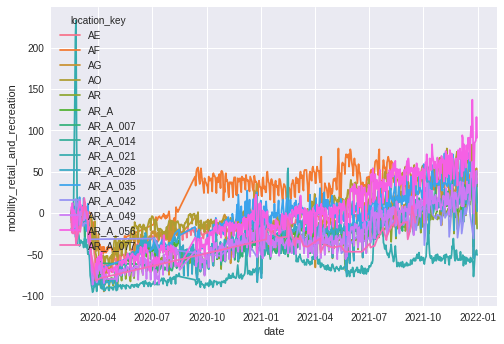

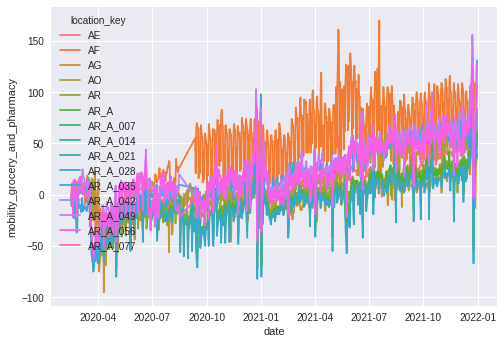

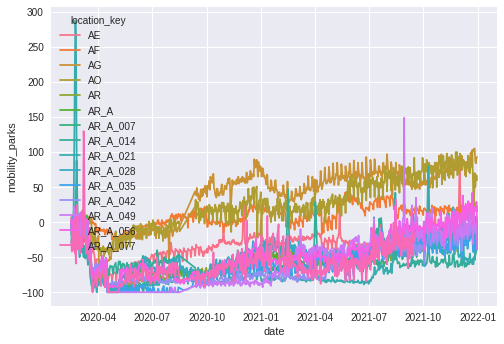

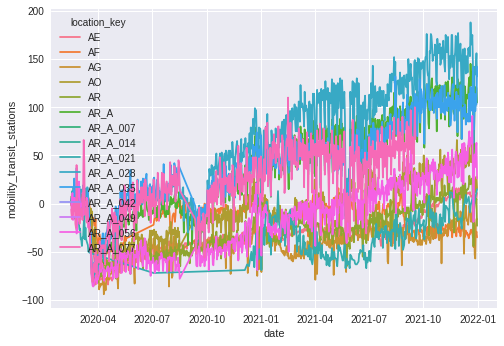

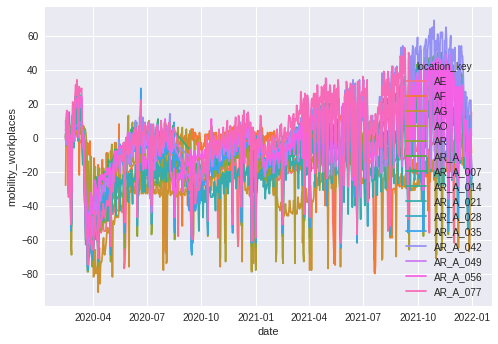

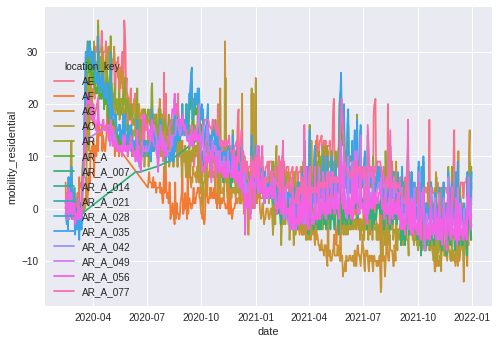

In [57]:
# plot each column
for y in df_google.columns.values[2:]:
  sns.lineplot(data=df_google.iloc[:10000], x="date", y=y, 
               hue="location_key")
  plt.show()

# Import Data 3: Index

location_key -> country_name

In [7]:
df_index = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/index.csv")
df_index = df_index[["location_key", "country_name"]]
df_index

,location_key,country_name
0,AD,Andorra
1,AE,United Arab Emirates
2,AF,Afghanistan
3,AF_BAL,Afghanistan
4,AF_BAM,Afghanistan
...,...,...
22953,ZA_WC_DC3,South Africa
22954,ZA_WC_DC4,South Africa
22955,ZA_WC_DC5,South Africa
22956,ZM,Zambia


# Import Data 4: Emergency Declarations

In [19]:
df_emergency = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/lawatlas-emergency-declarations.csv")
df_emergency

,date,location_key,lawatlas_mitigation_policy,lawatlas_state_emergency,lawatlas_emerg_statewide,lawatlas_travel_requirement,lawatlas_traveler_type_all_people_entering_the_state,lawatlas_traveler_type_travelers_from_specified_states,lawatlas_traveler_type_travelers_from_specified_countries,lawatlas_traveler_type_general_international_travelers,lawatlas_traveler_type_all_air_travelers,lawatlas_requirement_type_traveler_must_self_quarantine,lawatlas_requirement_type_traveler_must_inform_others_of_travel,lawatlas_requirement_type_checkpoints_must_be_established,lawatlas_requirement_type_travel_requirement_must_be_posted,lawatlas_travel_statewide,lawatlas_home_requirement,lawatlas_home_except_engaging_in_essential_business_activities,lawatlas_home_except_obtaining_necessary_supplies,lawatlas_home_except_accessing_emergency_services,lawatlas_home_except_caring_for_a_person_outside_the_home,lawatlas_home_except_caring_for_a_pet_outside_the_home,lawatlas_home_except_engaging_in_outdoor_activities,lawatlas_home_except_attending_religious_services,lawatlas_home_except_engaging_in_essential_health_care_services,lawatlas_home_statewide,lawatlas_curfew_reg,lawatlas_mask_requirement,lawatlas_mask_statewide,lawatlas_business_close,lawatlas_business_type_all_non_essential_businesses,lawatlas_business_type_non_essential_retail_businesses,lawatlas_business_type_entertainment_businesses,lawatlas_business_type_personal_service_businesses,lawatlas_business_type_restaurants,lawatlas_business_type_bars,lawatlas_business_type_fitness_centers,lawatlas_essential_def_appliance_stores,lawatlas_essential_def_convenience_stores,lawatlas_essential_def_gas_stations,...,lawatlas_gathering_ban,lawatlas_gathering_type,lawatlas_gathering_statewide,lawatlas_med_restrict,lawatlas_med_except_delay_would_threaten_patients_health,lawatlas_med_except_delay_would_threaten_patients_life,lawatlas_med_except_procedure_needed_to_treat_emergency,lawatlas_med_except_procedure_does_not_deplete_hospital_capacity,lawatlas_med_except_procedure_does_not_deplete_personal_protective_equipment,lawatlas_med_except_family_planning_services,lawatlas_med_except_no_exception_specified,lawatlas_abortion_essential_new,lawatlas_med_statewide,lawatlas_correct_requirement,lawatlas_correct_facility_all_state_facilities,lawatlas_correct_facility_all_department_of_corrections_facilities,lawatlas_correct_facility_all_county_jails,lawatlas_correct_facility_juvenile_detention_centers,lawatlas_correct_type_intakes_suspended,lawatlas_correct_type_duty_to_receive_prisoners_suspended,lawatlas_correct_type_transfers_to_custody_suspended,lawatlas_correct_type_release_of_inmates,lawatlas_correct_type_rules_regarding_inmate_release_suspended,lawatlas_correct_type_release_notice_suspended,lawatlas_correct_type_cease_in_person_parole_hearings,lawatlas_correct_type_develop_process_for_virtual_parole_hearings,lawatlas_correct_type_visitation_suspended,lawatlas_correct_statewide,lawatlas_state_preempt,lawatlas_action_preempt_imposing_additional_social_distancing_limitations_on_essential_business,lawatlas_action_preempt_imposing_additional_restrictions_on_public_spaces,lawatlas_action_preempt_restricting_scope_of_services_of_an_essential_business,lawatlas_action_preempt_expanding_the_definition_of_non-essential_business,lawatlas_action_preempt_restricting_the_hours_of_operation_of_an_essential_business,lawatlas_action_preempt_imposing_restrictions_that_conflict_with_state_order,lawatlas_action_preempt_restricting_the_performance_of_an_essential_function,lawatlas_action_preempt_restricting_people_from_leaving_home,lawatlas_action_preempt_restricting_the_operations_of_schools,lawatlas_action_preempt_imposing_gathering_bans,lawatlas_local_allow
0,2020-01-20,US_AK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

# Import Data 5: Weather

In [29]:
df_weather = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/weather.csv")
df_weather = df_weather.iloc[:10000]
df_weather["date"] = pd.to_datetime(df_weather["date"]).apply(lambda x: x + pd.to_timedelta(np.random.rand(), unit="H"))
df_weather

,date,location_key,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,2020-01-01 00:55:43.620513600,AD,4.236111,0.138889,8.208333,3.302000,NaN,-0.972222,72.773049
1,2020-01-02 00:07:16.305690000,AD,3.875000,-0.722222,10.055556,6.688667,NaN,-1.625000,70.841314
2,2020-01-03 00:53:04.224692400,AD,4.763889,0.597222,8.402778,5.016500,NaN,-0.611111,71.117248
3,2020-01-04 00:39:51.713323200,AD,4.555556,1.125000,8.708333,3.810000,NaN,0.722222,77.338640
4,2020-01-05 00:49:23.664572400,AD,4.763889,-1.000000,11.361111,2.476500,NaN,-3.361111,60.762380
...,...,...,...,...,...,...,...,...,...
9995,2021-07-29 00:10:26.368986000,AF_HER,29.266667,20.933333,35.944444,0.000000,NaN,4.555556,21.449583
9996,2021-07-30 00:04:45.201871200,AF_HER,27.622222,21.933333,33.555556,0.000000,NaN,6.766667,26.830514
9997,2021-07-31 00:51:37.068595200,AF_HER,27.344444,19.322222,34.444444,0.000000,NaN,1.155556,18.484020
9998,2021-08-01 00:19:33.544318800,AF_HER,28.144444,19.622222,35.677778,0.000000,NaN,-0.266667,16.102776


# Merge Dataset

In [42]:
x = df.iloc[:100000]

y = df_google.iloc[:100000]
# 1. join by (date, location_key) to get country name
y = pd.merge(y, df_index, left_on=["location_key"], right_on=["location_key"], how="inner")

# 2. join by (date, country_name) to get cases and mobility
z = pd.merge(x, y, left_on=["Date", "Country_Region"], right_on=["date", "country_name"], how="left")
z

w = df_weather
# 3. join by nearest (date, location_key) to get cases, mobility and weather
# on is for approximate matching, by is for exact matching
z = pd.merge_asof(z.sort_values("Date"), w.sort_values("date"), 
              left_on="Date", right_on="date", tolerance=pd.Timedelta('1day'),
              left_by=["location_key"], right_by=["location_key"])

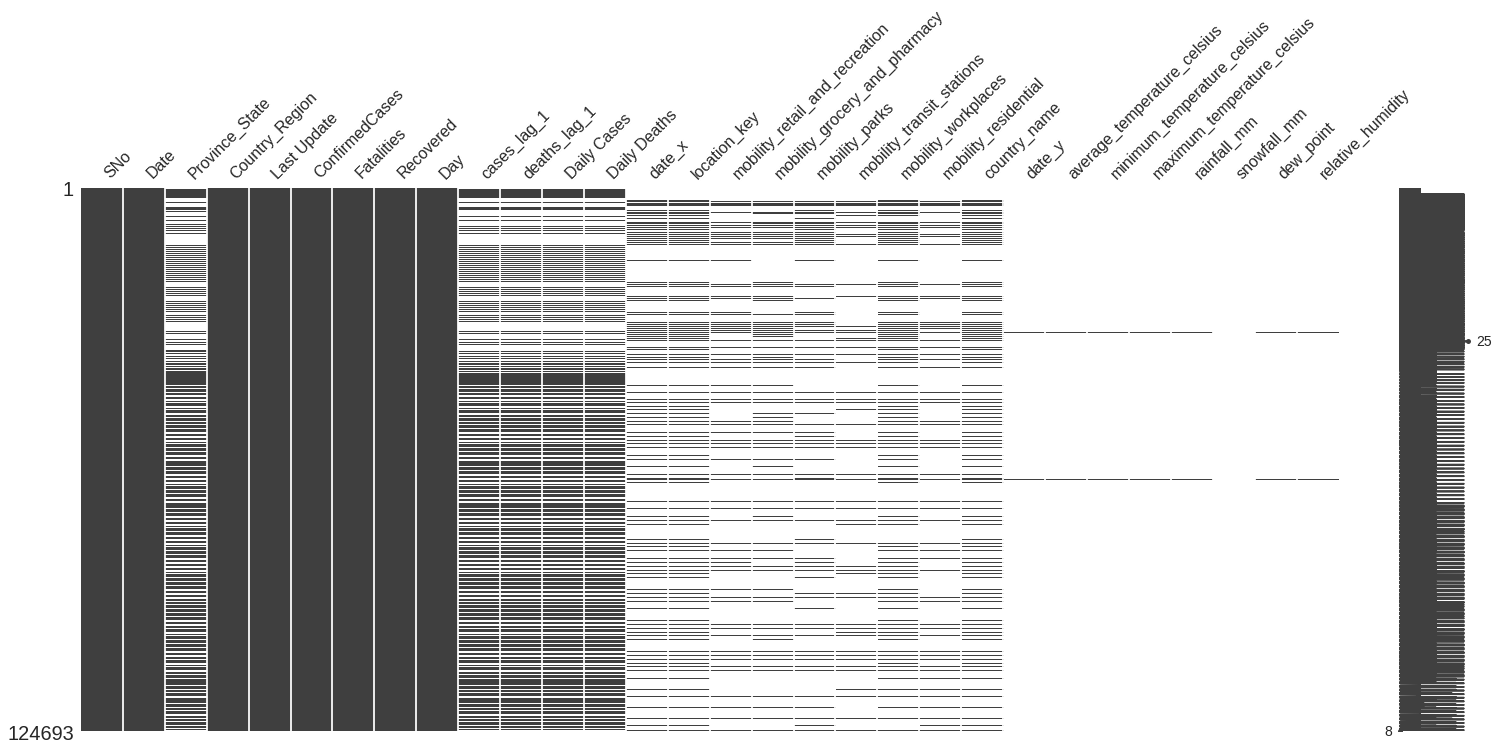

In [43]:
# Visualise Missing Information

import missingno
missingno.matrix(z)